<a href="https://colab.research.google.com/github/saxena919/CAPSTONE-PROJECT-1-HOTEL-OOKING-ANALYSIS/blob/main/Individual_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_location = '/content/drive/MyDrive/Capstone Project 1/'
data_hotel = pd.read_csv(data_location + 'Hotel Bookings.csv')

In [ ]:
data_hotel.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
data_hotel.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
data_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
data_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

 # Data Cleaning

Now, we will perform some data cleaning steps in our dataset to make it more informative for proper visualization

In [ ]:
# We will first create copy of data set, so that our original data does not get affected.
data_hotelc = data_hotel.copy()

In [ ]:
# Finding Columns having Null values
data_hotelc.isnull().sum().sort_values(ascending=False).head(8)

company               112442
agent                  16280
country                  478
children                   4
reserved_room_type         0
assigned_room_type         0
booking_changes            0
deposit_type               0
dtype: int64

In [ ]:
# If company name or agent id is null, we are replacing it with 0.
data_hotelc[['company', 'agent']] = data_hotelc[['company', 'agent']].fillna(0.0)

# The missing values in the country column are replaced with mode value that appears mostly.
data_hotelc['country'].fillna(data_hotelc.country.mode().to_string(), inplace=True)

# The missing children values are replaced with rounded mean value for proper evaluation of the data set.
data_hotelc['children'].fillna(round(data_hotelc.children.mean()), inplace=True)

In [ ]:
data_hotelc.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Droping those rows where there is no baby, children, and adult.
data_hotelc = data_hotelc.drop(data_hotelc[(data_hotelc.adults+data_hotelc.babies+data_hotelc.children)==0].index)

In [ ]:
# For proper calculation on data set we are converting datatype of children, company, agent columns from float to integer.
data_hotelc[['children', 'company', 'agent', ]] = data_hotelc[['children', 'company', 'agent', ]].astype('int64')

# Data Visualization

## First Objective: Hotel wise yearly bookings

In [ ]:
 # Years in which guest come
years = data_hotelc['arrival_date_year'].unique() 
years

array([2015, 2016, 2017])

Text(0.5, 1.0, 'Total Yearly Bookings')

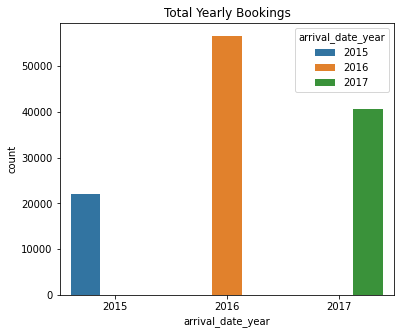

In [ ]:
# Plotting Total Hotel Bookings Yearly
plt.subplots(figsize=(6,5))
sns.countplot (x= 'arrival_date_year', data= data_hotelc, hue='arrival_date_year')
plt.title('Total Yearly Bookings')

Text(0.5, 1.0, 'Yearly Bookings')

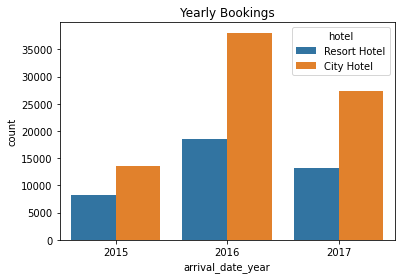

In [ ]:
# Plotting Hotel wise Bookings Yearly
sns.countplot (x= 'arrival_date_year', data = data_hotelc, hue= 'hotel')
plt.title('Yearly Bookings') 

**INFERENCE:**

As per the plot we can see **The Highest number of bookings happened in 2016**, and comparision of hotels booking is **City Hotel Booking is more than Resort Hotel Booking** every year. Further, more yesr 2016 bookings are more compared to 2015. Although, the bookings were decreased by almost 15% in 2017.

##  Second Objective: Findings Yearly number of hotel bookings that were canceled and not canceled

Text(0.5, 1.0, 'Yearly Hotel-wise bookings that are not canceled')

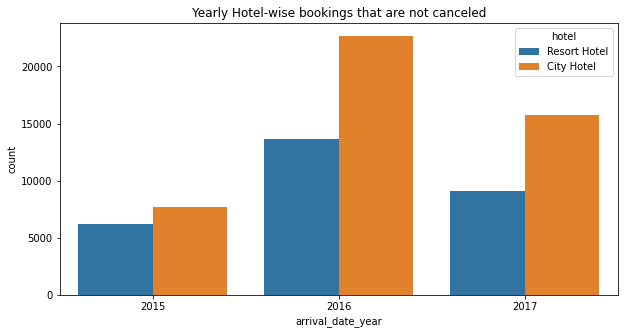

In [ ]:
# Yearly Hotel-wise bookings that are not canceled
data_hotel_not_canceled = data_hotelc[data_hotelc['is_canceled'] != 1]
plt.subplots(figsize=(10,5))
sns.countplot(x='arrival_date_year', data = data_hotel_not_canceled, hue='hotel')
plt.title('Yearly Hotel-wise bookings that are not canceled')


**INFERENCE:**

The above countplot shows that in every year number of not canceled bookings are more in City hotel bookings than compared to Resort hotel.



Text(0.5, 1.0, 'Yearly Hotel-wise bookings that are canceled')

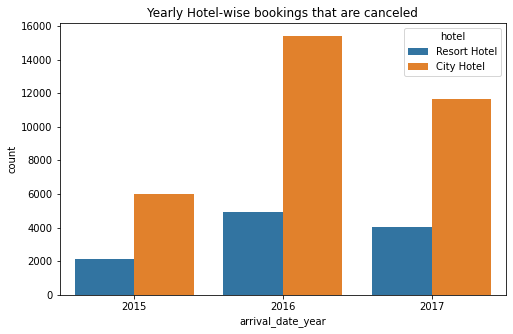

In [ ]:
# Yearly Hotel-wise bookings that are canceled
data_hotel_canceled = data_hotelc[data_hotelc['is_canceled'] == 1]
plt.subplots(figsize=(8,5))
sns.countplot(x='arrival_date_year', data = data_hotel_canceled, hue='hotel')
plt.title('Yearly Hotel-wise bookings that are canceled')

**INFERENCE:**

The above countplot shows that City hotel bookings are more cancelled commpared to Resort hotel every year. 

## Third Objective: Most guests are coming from which country

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Country from where most guests are coming')

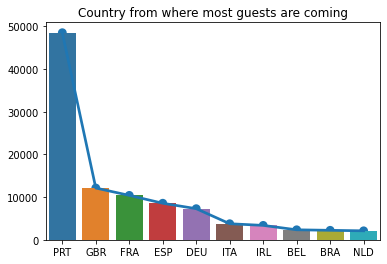

In [ ]:
# Plotting from which Country the most guests are coming.
county_index = list(data_hotelc.country.value_counts().head(10).index)
county = list(data_hotelc.country.value_counts().head (10))
sns.barplot (county_index, county)
sns.pointplot (x= county_index, y = county)
plt.title('Country from where most guests are coming')


**INFERENCE:**

Highest visitors are from countries like Portugal, United Kingdom, France, Spain and Germany, more than 80% come from these five countries.

## Fourth Objective: Market Segment wise hotel bookings

Text(0.5, 1.0, 'Market Segments wise booking')

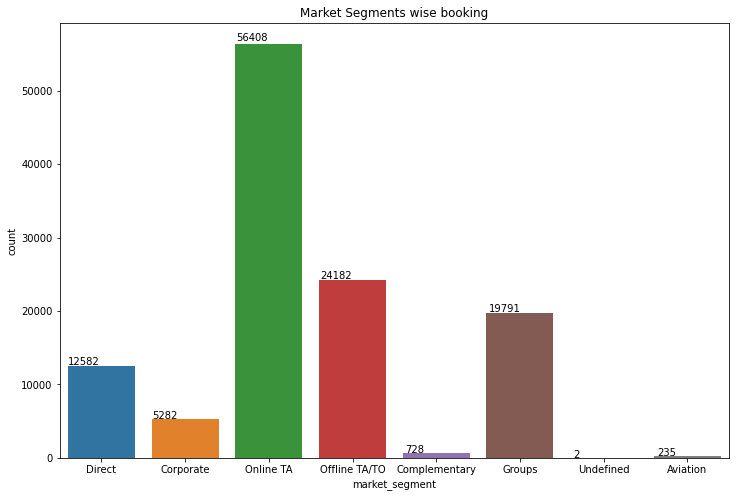

In [ ]:
# Plotting booking of hotels market segment wise
plt.subplots(figsize=(12, 8))
gx = sns.countplot(x = "market_segment", data = data_hotelc)
for x in gx.patches:
    gx.annotate(str(x.get_height()), (x.get_x() * 1.007, x.get_height() * 1.007))
plt.title("Market Segments wise booking")    

**Inference:** 

Bookings through online and offline travel agents are higher as compared to group bookings and direct bookings. The majority of people go for travel agents for hotel bookings.

## Fifth Objective: Finding cancellations with respect to customer types

Text(0.5, 1.0, 'Hotel booking cancellations with respect to customer type')

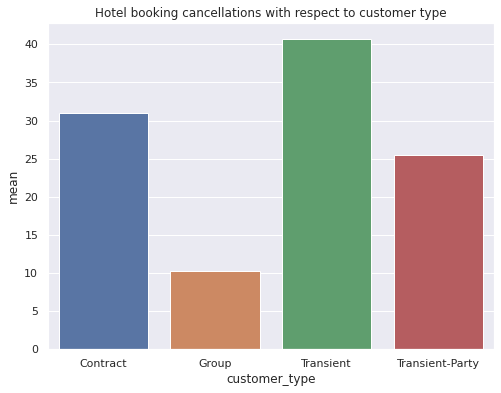

In [ ]:
# Plotting hotel booking cancellations with respect to customer types.
plt.subplots(figsize=(8, 6))
x = df_hotel.groupby("customer_type")['is_canceled'].describe()
sns.barplot(x = x.index, y = x["mean"] * 100)
plt.title('Hotel booking cancellations with respect to customer type')

**Inference:**

The plot shows that majority of bookings are transient. Transient booking is a booking that is not a part of a contract or group. This shows that Booking online is becoming increasingly consumer friendly.

## Sixth Objective: Busy months for Hotels

Text(0, 0.5, 'Count')

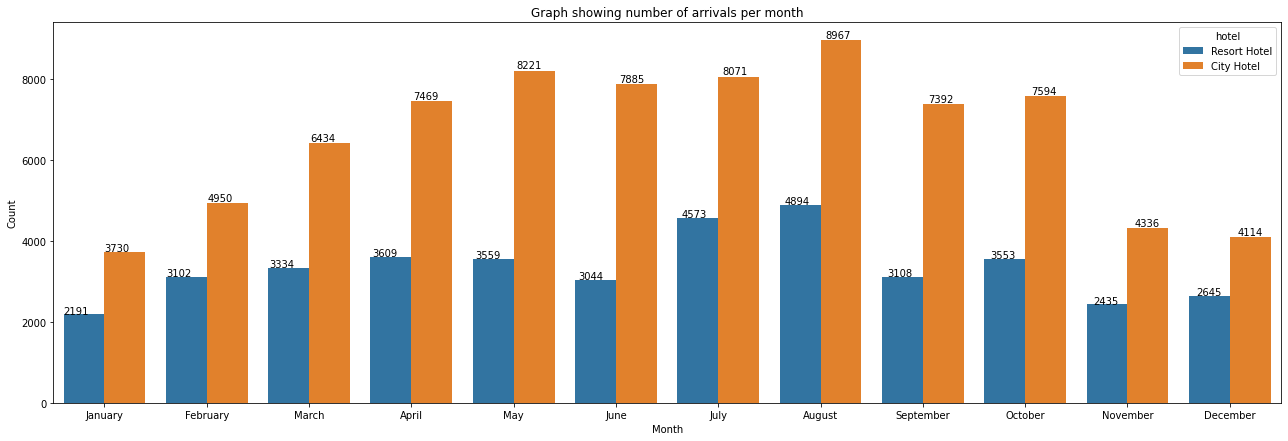

In [ ]:
# Plotting monthly hotel wise bookings 
plt.figure(figsize=(22,7))
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']
bx = sns.countplot(x = 'arrival_date_month', hue = 'hotel', data = data_hotelc[['hotel', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']], order = month)
for x in bx.patches:
    bx.annotate(str(x.get_height()), (x.get_x() * 1.007, x.get_height() * 1.007))
plt.title('Graph showing number of arrivals per month')
plt.xlabel('Month') 
plt.ylabel('Count') 

**Inference:**

above count plot shows bookings for both City and Resort Hotel are high in July and August, and lower in start and end of the year. Period from May to August is busiest for both the hotels. 

## Seventh Objective: Finding the Deposit Type with respect to cancelation

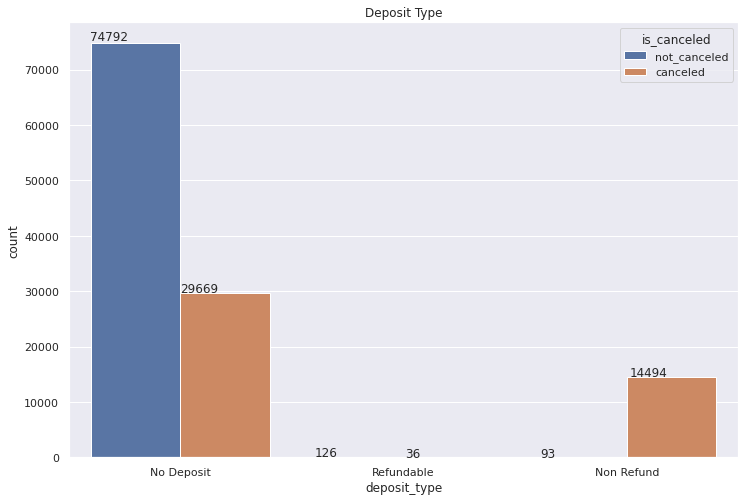

In [ ]:
plt.figure(figsize=(12, 8))
dx = sns.countplot(x = 'deposit_type', data = data_df, hue = 'is_canceled')
plt.title('Deposit Type')
for x in dx.patches:
    dx.annotate(str(x.get_height()), (x.get_x() * 1.007, x.get_height() * 1.007))

**Inference:**

The majority of bookings that are canceled are from deposit type that does not require any deposit, due to this the high cancelation rate is observed. Also it is interesting to note that refundable deposits had less cancellation than non-refundable deposits. Logically one would have assumed that non-refundable deposits have less cancellation as hotel rates are usually higher.

## Eights Objective: Finding the relationship between Reservation Status and cancelation

Text(0.5, 1.0, 'Reservation')

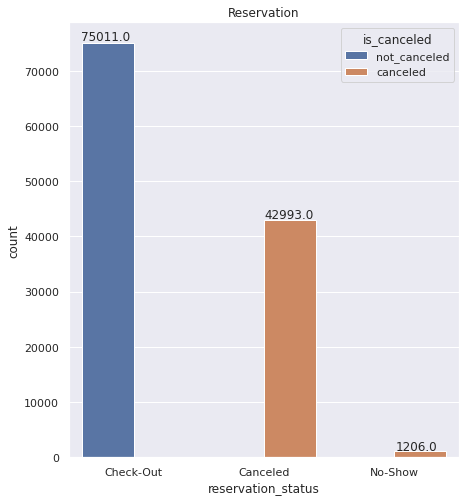

In [ ]:
# Plotting the Reservation status of visitors
plt.figure(figsize=(7,8))
dx = sns.countplot(x ='reservation_status', data = data_df, hue = 'is_canceled')
for x in dx.patches:
    dx.annotate(str(x.get_height()), (x.get_x() * 1.007, x.get_height() * 1.007))

plt.title('Reservation')

**Inference:**

The graph shows most of the people how booked the hotel done checkout. This implies most people who do the reservation came to the hotel.

Text(0.5, 1.0, 'Graph showing whether guest is repeated guest')

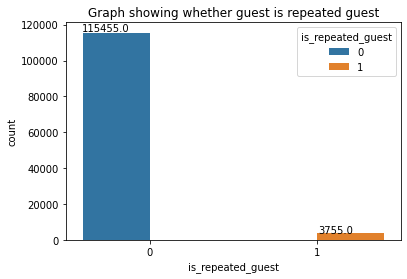

In [ ]:
# Plotting the Repeat Guest
dx = sns.countplot(data = data_df, x = 'is_repeated_guest', hue = 'is_repeated_guest')
for x in dx.patches:
    dx.annotate(str(x.get_height()), (x.get_x() * 1.007, x.get_height() * 1.007))

plt.title('Graph showing whether guest is repeated guest')

**Inference:**

The plot shows very low number of repeated guests. Further, marketing or business should be drafted to improve repeated guests.

**SUMMARY**

Hotel Booking Analysis project was done by 2 team members – Shubham and Amit Saxena. In this project, we got a hotel booking CSV file as input. 

So, we decided first to explore the dataset to find out features that will be useful in doing our analysis. 


**AMIT**

The Hospitality industry sector is one of the most profitable, accounting for more than 8% of the country's workforce and hotels plays a vital role in the hospitality services. Good Hospitality services can attract more visitors to hotels which in turn can provide more growth to the tourism industry. In this project we are tying to showcase interesting facts respect to hotels and visitors point of view. Hotels can get more insight related to facilities and how can increase visitors at the same time. It will also provide best time for booking and offers provided by the hotels. 

The present data set includes hotel booking analysis from 2015 to 2017 in City and Resort hotels and includes some interesting features such as arrival_date_year, customer_type, is_canceled, market_segment, meal, tays_in _weekend_nights, stays_in_week_nights, adults, children, babies, is_repeated_guest that I have used while analyzing the data set.
First of all I strarted the cleaning of data set to remove bad data from the data set by dropping unnecessary columns, replacing columns  that have null values with 0, and missing values in the country and children columns are replaced with mode and mean values respectively. Afterhat, I did data visualization on the respective data set. Some of my key findings were: 

1) The Highest number of bookings happened in 2016, City Hotel Booking is more than Resort Hotel Booking and bookings were decreased by almost 15% in 2017.

2) From May to August the hotels are busy. 

3) Bookings through online and offline travel agents are higher as compared to group bookings and direct bookings. The majority of people go for travel agents for hotel bookings. 

4) More than 80% of visitors are coming from countries like Portugal, United Kingdom, France, Spain, and Germany. 

5) The majority of bookings that are canceled are from deposit type that does not require any deposit, due to this the high cancelation rate is observed. Also it is interesting to note that refundable deposits had less cancellation than non-refundable deposits. Logically one would have assumed that non-refundable deposits have less cancellation as hotel rates are usually higher.


**CONCLUSION**

**HOTEL'S PERSPECTIVE**

1. Overall, People prefer City hotels over Resort Hotels. So, the hospitality industry can create new City hotels and can provide offers to visitors in Resort hotels to engage more visitors.
2. People for a shorter duration of stay prefer City hotels over Resort hotels and for longer stays go for Resort hotels.
3. From May to August the hotels seem busy. During this period hotels can increase their price for increasing their profits. Although, at the end and start of the year very few visitors arrive, in this period hotels can provide promotional offers to attract visitors.
4. Couples with no children and babies prefer to stay in both types of hotels. But couples with babies prefer to stay in Resort hotels. So, additional couple services can be provided to attract visitors towards hotels. Also, services like baby care can be provided in Resort hotels.
5. Visitors mostly prefer online/offline travel agents and tour operators for their hotel bookings. So, hotel advertising can be processed from this channel to increase the range of hotels.
6. More than 70% of people prefer BB meals, so menu prices can be increased. As most people prefer to do breakfast in hotels. At the same time, additional offers for lunch and dinners should be added to attract visitors.
7. The majority of bookings that are canceled are from a no deposit type that does not require any amount to be deposited, due to this a high cancelation rate is observed. Also, it is interesting to note that refundable deposits had fewer cancellations than non-refundable deposits. Logically one would have assumed that non-refundable deposits have fewer cancellations as hotel rates are usually higher.
8. The majority of bookings are transient (booking that is not a part of a contract or group). This shows that Booking online is becoming increasingly consumer friendly. Hotels can advertise and provide offers through this channel to increase their sales.
9. Countries like  Germany, Italy, Ireland, Belgium, Brazil, and the Netherlands have a very less number of visitors. Since they are in the top 10 countries from where visitors are coming so these country visitors have the potential to increase further if a proper advertising channel is established to engage them.
10. The most painful analysis in this data set is a very less number of people repeated, this shows people are not satisfied with the hotel services. Proper feedback should be taken at checkouts. Plus proper connectivity channels should be established with the visitors and hotels should send promotional offers and reminders to the visitors regularly to retain them.


**VISITOR'S PERSPECTIVE**

1. People planning big parties in resort and city hotels can plan at the start or end of the year as there is no rush and they can get heavy discounts in this period.
2. People can use online/offline travel agents and tour operators for booking their tickets since they seem to be the most trustworthy while booking hotels and people can also get better deals in the future through this channel.
3. People can go for BB meals in hotels since 77% of visitors preferred it.

